In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
df = pd.read_csv('concat_data.csv')

In [83]:
df.shape

(41106, 20)

In [84]:
df.head()

,Unnamed: 0,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [85]:
X = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit','sections']]
y = df['target']

In [86]:
print(X.shape)
print(y.shape)

(41106, 15)
(41106,)


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 12)

In [88]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

## RandomForestClassifier

In [89]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 200, max_depth = 25)
rf = rf.fit(X_train_scaled, y_train)

In [90]:
print(f"Train Score: {rf.score(X_train_scaled, y_train)}")
print(f"Test Score: {rf.score(X_test_scaled, y_test)}")

Train Score: 0.9955702407319995
Test Score: 0.7867305565794324


In [91]:
print(rf.feature_importances_)

[0.10554146 0.08422249 0.02868844 0.07261668 0.01036813 0.07425259
 0.10616865 0.17494223 0.05107605 0.06928755 0.05402352 0.07308073
 0.00732502 0.0495548  0.03885166]


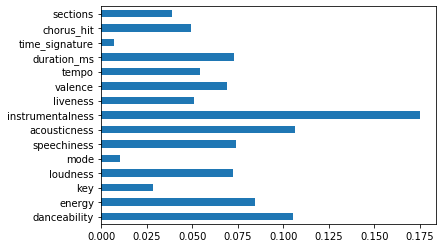

In [92]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()

## DecisionTreeClassifier

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

f1_score = metrics.f1_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print('F1 Score: {}'.format(f1_score))
print('Accuracy: {}'.format(accuracy))

F1 Score: 0.703794460533155
Accuracy: 0.7059343899741983


In [94]:
print(dt.feature_importances_)

[0.09561139 0.06050038 0.02537391 0.05864952 0.0098531  0.07662418
 0.12030358 0.22519847 0.05374789 0.06190644 0.06270781 0.06910642
 0.00580032 0.04809602 0.02652058]


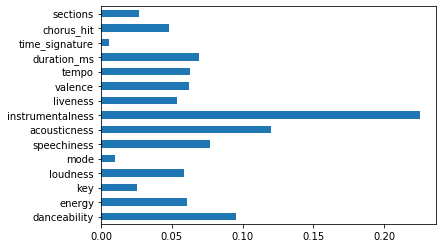

In [95]:
feat_importances = pd.Series(dt.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()

## LogisticRegression

In [96]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lreg = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(f"Training Score: {lr.score(X_train, y_train)}")
print(f"Testing Score: {lr.score(X_test, y_test)}")

Training Score: 0.4994735122181475
Testing Score: 0.5010689273866569


## Neural Network

In [97]:
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

y_train_categorical

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [98]:
## Building Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(units = 14, input_dim = 15, activation = 'relu'))
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units = 50, activation = 'relu'))

model.add(Dense(units = 2, activation = 'softmax'))

In [99]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 14)                224       
_________________________________________________________________
dense_13 (Dense)             (None, 100)               1500      
_________________________________________________________________
dense_14 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 102       
Total params: 6,876
Trainable params: 6,876
Non-trainable params: 0
_________________________________________________________________


In [100]:
## Compiling model

import tensorflow as tf

opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [101]:
##Training model

history = model.fit(X_train_scaled, y_train_categorical, epochs = 50,batch_size=2000, shuffle=True, verbose = 2)

Epoch 1/50
14/14 - 0s - loss: 0.6476 - accuracy: 0.5649
Epoch 2/50
14/14 - 0s - loss: 0.5744 - accuracy: 0.7011
Epoch 3/50
14/14 - 0s - loss: 0.5438 - accuracy: 0.7219
Epoch 4/50
14/14 - 0s - loss: 0.5308 - accuracy: 0.7328
Epoch 5/50
14/14 - 0s - loss: 0.5223 - accuracy: 0.7372
Epoch 6/50
14/14 - 0s - loss: 0.5156 - accuracy: 0.7417
Epoch 7/50
14/14 - 0s - loss: 0.5105 - accuracy: 0.7449
Epoch 8/50
14/14 - 0s - loss: 0.5061 - accuracy: 0.7478
Epoch 9/50
14/14 - 0s - loss: 0.5029 - accuracy: 0.7506
Epoch 10/50
14/14 - 0s - loss: 0.4997 - accuracy: 0.7538
Epoch 11/50
14/14 - 0s - loss: 0.4968 - accuracy: 0.7552
Epoch 12/50
14/14 - 0s - loss: 0.4946 - accuracy: 0.7579
Epoch 13/50
14/14 - 0s - loss: 0.4922 - accuracy: 0.7598
Epoch 14/50
14/14 - 0s - loss: 0.4903 - accuracy: 0.7616
Epoch 15/50
14/14 - 0s - loss: 0.4885 - accuracy: 0.7632
Epoch 16/50
14/14 - 0s - loss: 0.4870 - accuracy: 0.7628
Epoch 17/50
14/14 - 0s - loss: 0.4854 - accuracy: 0.7649
Epoch 18/50
14/14 - 0s - loss: 0.4835 - 

In [102]:
model_loss_train, model_accuracy_train = model.evaluate(X_train_scaled, y_train_categorical, verbose = 2)
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose = 2)

print(f"Training loss: {model_loss_train}, Accuracy:{model_accuracy_train}")
print(f"Testing loss: {model_loss}, Accuracy:{model_accuracy}")

861/861 - 1s - loss: 0.4569 - accuracy: 0.7811
424/424 - 0s - loss: 0.4746 - accuracy: 0.7760
Training loss: 0.45694997906684875, Accuracy:0.7810900211334229
Testing loss: 0.4745766222476959, Accuracy:0.775967538356781


In [103]:
from pprint import pprint
pprint(history.history.keys())

dict_keys(['loss', 'accuracy'])


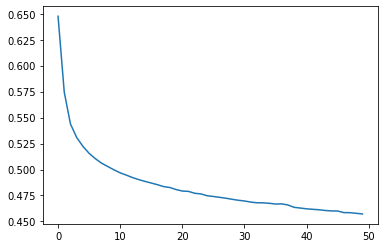

In [104]:
plt.plot(range(len(history.history['loss'])), history.history['loss'])
plt.show()

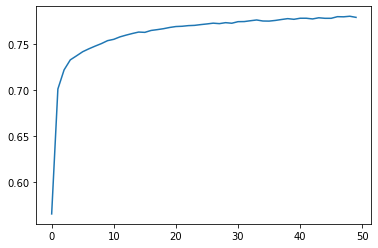

In [105]:
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'])
plt.show()

In [115]:
import pickle
import gzip
pickle.dump(rf, gzip.open("final_model.pkl", 'wb'), protocol=pickle.HIGHEST_PROTOCOL)